# Выявление закономерностей, определяющих успешность игры

В целях определения потенциально популярных продуктов и планирования рекламной кампании будет проведен анализ данных о играх за период по 2016 год.
Предосталвенные данные содержат информацию о компьютерных играх в разрезе платформ, жанров, продаж по регионам, оценок критиков и пользователей, рейтингов ESRB.

В целях достижения цели исследования будут реализованы следующие этапы:

Считывание предоставленных данных в DataFrame Pandas, изучение общей информации о данных.
Предобработка данных, заполнение отсутствующих значений, изменение типов данных.
Получение новых данных по исходным, в том числе общей суммы продаж, названия компании, выпустившей платформу.
Составление портрета пользователя для каждого региона с описанием наиболее популярных платформ и жанров игр, оценка влияния рейтинга ESRB на величину продаж.
Кроме того, будет проверен ряд гипотез:
* средние пользовательские рейтинги платформ Xbox One и PC равны;
* средние пользовательские рейтинги жанров Action и Sports равны.

По результатам анализа данных о продажах компьютерных игр будут определены потенциально популярные продукты и сформированы предложения для учета при планировании рекламной кампании.

# Этап 1. Получение данных

## Импорт библиотек

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


Прочитаем файл *games.csv.* и сохраним его в переменной *games_base*. 

In [2]:
games_base = pd.read_csv('/datasets/games.csv')

Получим первых 10 строк таблицы.

In [3]:
games_base.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о данных таблицы *games_base*.

In [4]:
games_base.info() # <получение общей информации о данных в таблице games_base>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.

Всего в таблице 11 столбцов, тип данных у каждого столбца - object, float64.

Подробно разберём, какие в *games_base* столбцы и какую информацию они содержат:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Согласно представленной информации, данные за 2016 год могут быть неполными.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.



**Вывод по этапу 1**

Каждая строка таблицы содержит информацию о компьютерной игре определённой платформы, жанра, суммах продаж по регионам, оценках критиков и пользователей, рейтинге ESRB. Две проблемы, которые нужно решать: пропуски и некачественные названия столбцов. Для проверки рабочих гипотез необходим будет дополнительный столбец с суммой общих продаж, особенно ценны столбцы  *Critic_Score* и *User_Score*. Данные из столбцов *Platform* и *Genre* позволят узнать самые популярные платформы и жанры.
    

# Этап 2. Предобработка данных

Исключим пропуски, переименуем столбцы, а также проверим данные на наличие дубликатов.

Рассмотрим внимательнее названия столбцов.

In [5]:
games_base.columns # Вывод названий столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В названиях столбцов отсутствуют пробелы, которые могли бы затруднять доступ к данным. Приведем названия столбцов в нижний регистр.

In [6]:
# Перевод названий столбцов в нижний регистр.
games_base.columns = games_base.columns.str.lower()

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [7]:
games_base.isnull().sum() # Посмотрим количество пропусков по столбцам

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пустые значения свидетельствуют, что для некоторых игр доступна не вся информация. Причины могут быть разные: не указан год выпуска игры, оценки критиков и пользователей, а также рейтинг. Кроме того в двух строках отсутствует название игры, что может свидетельствовать о проблеме с записью данных. Каждый отдельный случай необходимо разобрать и выявить причину.

Удаляем в столбце с названием игры пустые значения.

In [8]:
games_base.dropna(subset = ['name'], inplace = True) # Удаление строк 
                                              # с пустым значение в стобце name

Учитывая, что в столбце с годом выпуска отсутствующие значения приходятся на старые платформы, удалим эти строки и изменим тип данных этого столбца.

In [9]:
# Удаление строк с пустым значением в столбце год выпуска
games_base.dropna(subset = ['year_of_release'], inplace = True)
# Изменение типа данных столбца с годом выпуска игры
games_base['year_of_release'] = games_base['year_of_release'].astype('int16')

Для дальнейшего использования приведем значения столбца *name* в более единообразную форму. Для этого удалим пробелы в начале и в конце названия игр.

In [10]:
# Удаление пробелов в начале и конце названий игр
games_base['name'] = games_base['name'].str.strip()

Обработаем значения столбца *user_score*. Предварительный анализ показал, что от содержит строки, в которых имеются оценки пользователей, содержат значение "tbd" и пустые значения. Для того, чтобы преобразовать данные указанного столбца в числовой тип, заменим значения "tbd" на -1.

In [11]:
# Замена в столбце user_score значений "tbd" на -1 
# и предбразование типа данных
games_base.loc[games_base['user_score'] == 'tbd', 'user_score'] = -1
games_base['user_score'] = games_base['user_score'].astype('float64')

Сформируем сводную таблицу, которая будет содержать для каждой игры имеющиеся средние оценки критиков и пользователей.

In [12]:
# Формирование сводной таблицы с оценками игр критиками и пользователями
games_score = games_base.query('user_score!=-1').pivot_table(index='name', values=['user_score','critic_score'], aggfunc='mean')

Создадим функцию, с помощью которой обработаем данные в столбце с оценками пользователей. Данная функция будет производить замену значений если они пустые или равны -1. Для замены будут использоваться средние оценки пользователей по данной игре, при отсутствии средние оценки критиков.

In [13]:
# Функция для обработки значений в столбце с оценками пользователей
def user_score_update(data):
    user_score = data['user_score']
    name_game = data['name']
    user_score_new = user_score
    if user_score == -1 or user_score != user_score:
        if name_game in games_score.index:
            user_score_game = games_score.query(
                           'name==@name_game')['user_score'][0]
            if not(user_score_game!=user_score_game):
                user_score_new = user_score_game
            else:
                critic_score_game = games_score.query(
                           'name==@name_game')['critic_score'][0]
                if not(critic_score_game!=critic_score_game):
                    user_score_new = critic_score_game / 10 
    return user_score_new
games_base['user_score'] = games_base.apply(user_score_update, axis=1)
    


Оставшиеся пустые значения в столбце *user_score* заменим на -1.

In [14]:
games_base['user_score'] = games_base['user_score'].fillna(value=-1)

Проверим данные на наличие дубликатов.

In [15]:
games_base.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [16]:
# Подсчет суммарных продаж и запись в отдельный столбец
games_base['gross_sale'] = (games_base['na_sales'] + games_base['eu_sales']
                            + games_base['jp_sales'] + games_base['other_sales']
                             )
games_base['gross_sale_mean_year'] = games_base['gross_sale'] / (2017 - games_base['year_of_release'])

In [17]:
games_base

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gross_sale,gross_sale_mean_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.503636
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24,1.257500
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,3.946667
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4.096250
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38,1.494286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01,0.010000
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN,0.01,0.000909
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01,0.010000
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN,0.01,0.000714


In [18]:
# Подготовим списки компаний, выпускающих игровые платформы
nintendo_list = ['Wii','NES','DS','SNES','GBA','3DS','N64','WiiU','GC']
sony_list = ['PS3','PS2','PS4','PS','PSP','PSV']
microsoft_list = ['X360','XB','XOne']
pc_list = ['PC']
other_list = ['GB','2600','GEN','DC','SAT','SCD','WS','NG','TG16','3DO','GG','PCFX']

In [19]:
# Создадим функцию для формирования столбца с названием компании
def company(data):
    company = ''
    #print(data)
    platforma = data.platform
    #print(platforma)
    if platforma in nintendo_list:
        company = 'nintendo'
    elif platforma in sony_list:
        company = 'sony'
    elif platforma in microsoft_list:
        company = 'xbox'
    elif platforma in other_list:
        company = 'other'
    else:
        company = 'pc'
    return company
    
games_base['company'] = games_base.apply(company, axis=1) # Сформируем столбец 
                                  # с названием компании, выпустившей платформу

Получаем общую информацию о данных. Убеждаемся, что чистка выполнена успешно.

In [20]:
games_base.isnull().sum()

name                       0
platform                   0
year_of_release            0
genre                      0
na_sales                   0
eu_sales                   0
jp_sales                   0
other_sales                0
critic_score            8461
user_score                 0
rating                  6676
gross_sale                 0
gross_sale_mean_year       0
company                    0
dtype: int64

**Вывод по этапу 2**

На этапе предобработки в данных обнаружились пропуски и проблемы с названиями столбцов. Их удаление позволит провести анализ точнее. Поскольку сведения об оценках пользователей важно сохранить для анализа, не просто удаляем все пропущенные значения, но заполним пропущенные значения на основе имеющихся. Теперь данные более корректны и удобны для дальнейшей работы.

## Этап 3. Анализ данных

Группируем данные по году выпуска игры и вызовом метода count() подсчитываем количество игр.

In [21]:
games_base.groupby('year_of_release')['name'].count()
# <группировка данных таблицы games_base по столбцу 'year_of_release' и подсчёт количества значений столбца 'name'>

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca089dd10>]],
      dtype=object)

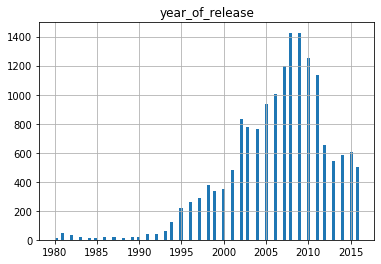

In [22]:
# Построим график выпуска игр по годам
games_base.query('year_of_release>=1980').hist('year_of_release', bins=100)

Рост количества игр начался с 1993 года и продолжался до 2009 года. Затем наметился спад. Таким образом, для подготовки прогноза на 2017 год не нужны все данные.

Посмотрим, как менялись продажи по платформам. 

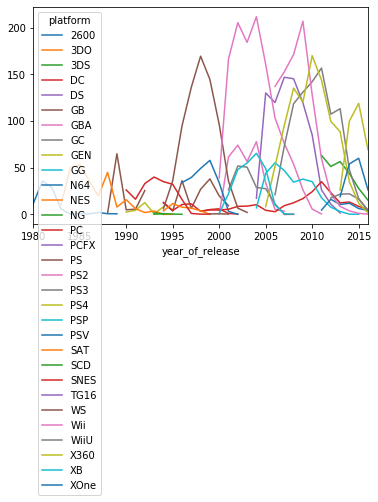

In [23]:
# Построение графика изменения продаж по платформам 
dynamics_on_the_platforms = games_base.pivot_table(index='year_of_release', columns='platform', values='gross_sale', aggfunc='sum')

dynamics_on_the_platforms.plot()

Найдем средний срок жизни платформ. Для этого сформируем сводную таблицу, содержащую данные о минимальном и максимальном годе выпуска игр, а также добавим столбец с разницей между максимальным и минимальным годом. По полученным данным рассчитаем средний срок жизни платформы, использовав записи, максимальный год выпуска у которых меньше или равен 2015.

In [27]:
# Создадим сводную таблицу с информацией о годе появления платформы 
# и годе последнего упонимания. Найдем срок жизни платформы.
platform_base = games_base.pivot_table(index='platform', 
                                       values=['year_of_release','gross_sale'],
                                       aggfunc={'year_of_release':['min','max'],
                                                'gross_sale':['sum','count']})
platform_base.columns = ['count_games_platform','gross_sale_platform','max_year','min_year']
platform_base['term_life'] = 1 + platform_base['max_year'] - platform_base['min_year']
mean_term_life = platform_base.query('max_year<=2015')['term_life'].mean()
print('Средний срок жизни платформы: {:.0f} лет.'.format(mean_term_life))

Средний срок жизни платформы: 8 лет.


In [28]:
platform_base

,count_games_platform,gross_sale_platform,max_year,min_year,term_life
platform,,,,,
2600,116,86.48,1989,1980,10
3DO,3,0.10,1995,1994,2
3DS,512,257.81,2016,2011,6
DC,52,15.95,2008,1998,11
DS,2121,802.78,2013,1985,29
GB,97,254.43,2001,1988,14
GBA,811,312.88,2007,2000,8
GC,542,196.73,2007,2001,7
GEN,27,28.35,1994,1990,5


Выберем платформы с наибольшими суммарными продажами. 

In [29]:
# Платформы с наибольшими суммарными продажами
platform_base.sort_values('gross_sale_platform',ascending = False).head(100)

,count_games_platform,gross_sale_platform,max_year,min_year,term_life
platform,,,,,
PS2,2127,1233.56,2011,2000,12
X360,1232,961.24,2016,2005,12
PS3,1306,931.34,2016,2006,11
Wii,1286,891.18,2016,2006,11
DS,2121,802.78,2013,1985,29
PS,1190,727.58,2003,1994,10
PS4,392,314.14,2016,2013,4
GBA,811,312.88,2007,2000,8
PSP,1193,289.53,2015,2004,12


Таким образом, средний срок жизни платформы составляет 8 лет. При этом, сушествовали платформы, срок жизни которых составлял 1 год, например, TG16. Максимальный срок жизни недействующей платформы составил 29 лет - DS. Платформа PC существует с 1985 года уже 32 года.

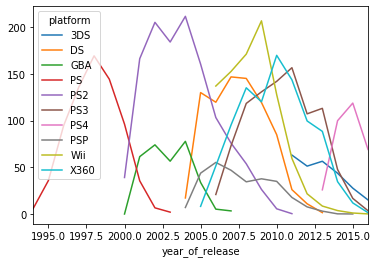

In [30]:
# Построение графика продаж наиболее денежных платформ
highest_sales_platform = platform_base.sort_values('gross_sale_platform',
                                            ascending = False).head(10).index
base_highest_sales = games_base.query(
    'platform in @highest_sales_platform').pivot_table(index='year_of_release',
                        columns='platform', values='gross_sale', aggfunc='sum')

base_highest_sales.query('year_of_release>=1993').plot()


Учитывая динамику продаж, а также действующие игровые платформы, наиболее актуальным период для построения прогноза на 2017 год является период с 2011.

In [31]:
# Сформируем выборку актуального периода
start_current_period = 2011 # Выбран 2011 год, так как до этого года был более
                            # активный рынок, чем текущий
base_for_analysis = games_base.query('year_of_release>=@start_current_period')
base_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 14 columns):
name                    4022 non-null object
platform                4022 non-null object
year_of_release         4022 non-null int16
genre                   4022 non-null object
na_sales                4022 non-null float64
eu_sales                4022 non-null float64
jp_sales                4022 non-null float64
other_sales             4022 non-null float64
critic_score            1812 non-null float64
user_score              4022 non-null float64
rating                  2314 non-null object
gross_sale              4022 non-null float64
gross_sale_mean_year    4022 non-null float64
company                 4022 non-null object
dtypes: float64(8), int16(1), object(5)
memory usage: 447.8+ KB


In [32]:
# Топ платформ
base_for_analysis.groupby('platform')['gross_sale'].sum().sort_values(
                                                ascending = False).head(10)

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
Name: gross_sale, dtype: float64

В выбранном периоде лидируют по совокупным продажам PS3, X360, PS4, 3DS и XOne. 

Выберем несколько потенциально прибыльных платформ с учетом стадии развития платформы и потенциальных объёмов продаж.

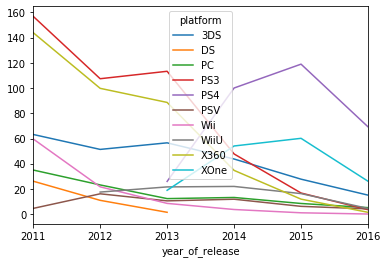

In [33]:
# Построение графика по актуальному периоду
highest_sales_platform = base_for_analysis.groupby(
    'platform')['gross_sale'].sum().sort_values(ascending = False).head(10).index
base_highest_sales = games_base.query(
    'platform in @highest_sales_platform').pivot_table(index='year_of_release',
                        columns='platform', values='gross_sale', aggfunc='sum')

base_highest_sales.query('year_of_release>=2011').plot()



In [34]:
# Получение списка актуальных платформ, срок жизни которых не более 8 лет 
platform_base.query('max_year==2016 and term_life<=8')

,count_games_platform,gross_sale_platform,max_year,min_year,term_life
platform,,,,,
3DS,512,257.81,2016,2011,6
PS4,392,314.14,2016,2013,4
PSV,429,53.81,2016,2011,6
WiiU,147,82.19,2016,2012,5
XOne,247,159.32,2016,2013,4


In [35]:
# Создание переменной с потенциально прибыльными платформами
best_platform = ['PS4', 'PSV', 'XOne', '3DS', 'WiiU','PC']


Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

In [36]:
base_best_platform = base_for_analysis.query(
                        'platform in @best_platform')

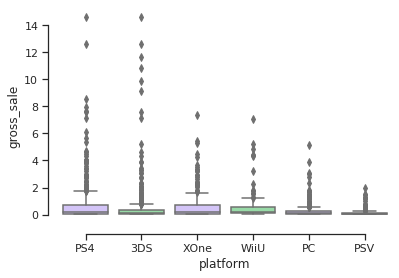

In [37]:
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="platform", y="gross_sale"
            , palette=["m", "g"],
            data=base_best_platform)
sns.despine(offset=10, trim=True)

Согласно графику разница в продажах между играми велика.


Посмотрим на средние продажи по платформам

In [42]:
base_best_platform.pivot_table(index='platform', values='gross_sale'
                              ).sort_values('gross_sale',ascending = False)

,gross_sale
platform,
PS4,0.801378
XOne,0.645020
WiiU,0.559116
3DS,0.503535
PC,0.251105
PSV,0.125431


Средние продажи у платформ также различны.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

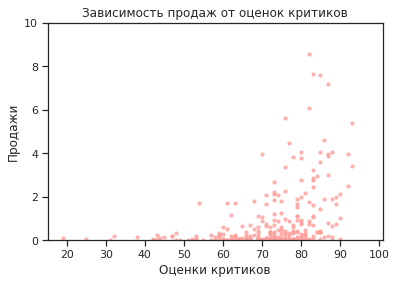

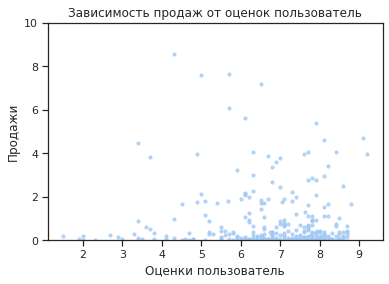

In [47]:
# Построим диаграммы рассеивания
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')
    plt.ylim(0, 10)
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

x_data = base_for_analysis.query('platform=="PS4"')['critic_score'] 
y_data = base_for_analysis.query('platform=="PS4"')['gross_sale']
scatterplot(x_data, y_data, x_label="Оценки критиков", y_label="Продажи", title="Зависимость продаж от оценок критиков", color = "r", yscale_log=False)

x_data = base_for_analysis.query('platform=="PS4" and user_score>0')['user_score'] 
y_data = base_for_analysis.query('platform=="PS4" and user_score>0')['gross_sale']
scatterplot(x_data, y_data, x_label="Оценки пользователь", y_label="Продажи", title="Зависимость продаж от оценок пользователь", color = "b", yscale_log=False)

In [54]:
# Получение коэффициентов корреляции между продажами и оценками критиков и пользователей
base_for_analysis.query('user_score>0')[['gross_sale','critic_score',
                                         'user_score']].corr()

,gross_sale,critic_score,user_score
gross_sale,1.000000,0.328809,0.040258
critic_score,0.328809,1.000000,0.531575
user_score,0.040258,0.531575,1.000000


Согласно полученным данным, чем выше оценки критиков и пользователей, тем выше продажи. Полученные коэффициенты корреляции свидетельствуют о прямой зависимости продаж от оценок критиков, связь между оценками пользователей и продажами менее выраженная. Аналигичные зависимости характерны для других платформ.

Посмотрим на общее распределение игр по жанрам.

In [55]:
base_for_analysis.groupby('genre')['gross_sale'].sum().sort_values(
                                                ascending = False).head(10)


genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Name: gross_sale, dtype: float64

Самыми прибыльными жанрами являются Action, Shooter, Role-Playing и Sports. Причем объём продаж по жанрам существенно различается, есть жанры с высокими продажами - Action, Shooter и низкими продажами - Adventure, Simulation.

## Вывод по этапу 3 ##

Рост количества игр начался с 1993 года и продолжался до 2009 года. Затем наметился спад. Таким образом, для подготовки прогноза на 2017 год не нужны все данные. 
Средний срок жизни платформы составляет 8 лет. При этом, сушествовали платформы, срок жизни которых составлял 1 год, например, TG16. Максимальный срок жизни недействующей платформы составил 29 лет - DS. Платформа PC существует с 1985 года уже 32 года.
Учитывая динамику продаж, а также действующие игровые платформы, наиболее актуальным период для построения прогноза на 2017 год был выбран период с 2011.
В выбранном периоде лидируют по совокупным продажам PS3, X360, PS4, 3DS и XOne. 
Потенциально прибыльными платформами являются PS4, PSV, XOne, 3DS, WiiU, PC.
Существует разница в продажах по играм, платформам, в том числе средние продажи у платформ.
Согласно полученным данным, чем выше оценки критиков и пользователей, тем выше продажи. Полученные коэффициенты корреляции свидетельствуют о прямой зависимости продаж от оценок критиков, связь между оценками пользователей и продажами менее выраженная. Аналигичные зависимости характерны для других платформ.
Самыми прибыльными жанрами являются Action, Shooter, Role-Playing и Sports. Кроме того, объём продаж по жанрам существенно различается, есть жанры с высокими продажами - Action, Shooter и низкими продажами - Adventure, Simulation.

## Шаг 4. Составление портрета пользователя для каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
Оценим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [56]:
# Создадим функцию для получения данных о продажах по регионам и жанрам 
def top_5(column2, column1):
    print('Самые популярные по продажам в '+column2[0:2].upper())
    print(base_for_analysis.groupby(column1)[column2].sum().sort_values(
                                                ascending = False).head())
    print()
    
regions = ['na_sales', 'eu_sales', 'jp_sales']
criterion = ['platform','genre']
for i in regions:
    for j in criterion:
        top_5(i,j)
    

Самые популярные по продажам в NA
platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

Самые популярные по продажам в NA
genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

Самые популярные по продажам в EU
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

Самые популярные по продажам в EU
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64

Самые популярные по продажам в JP
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

Самые популярные по продажам в JP
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


In [57]:
# Влияние рейтинга на продажи
rating_sales = base_for_analysis.pivot_table(index='rating', values=['na_sales','eu_sales',
                                'jp_sales'], aggfunc='sum', margins=True)
rating_sales['eu_share'] = rating_sales['eu_sales']/rating_sales['eu_sales']['All']
rating_sales['jp_share'] = rating_sales['jp_sales']/rating_sales['jp_sales']['All']
rating_sales['na_share'] = rating_sales['na_sales']/rating_sales['na_sales']['All']
rating_sales


,eu_sales,jp_sales,na_sales,eu_share,jp_share,na_share
rating,,,,,,
E,141.73,36.68,170.17,0.256210,0.341400,0.241010
E10+,78.00,11.23,117.72,0.141003,0.104523,0.166726
EC,0.00,0.00,0.42,0.000000,0.000000,0.000595
M,250.26,26.14,308.45,0.452402,0.243299,0.436855
RP,0.03,0.00,0.00,0.000054,0.000000,0.000000
T,83.16,33.39,109.31,0.150331,0.310778,0.154815
All,553.18,107.44,706.07,1.000000,1.000000,1.000000


#### Вывод по разделу 4:
По результатам анализа данных за период с 2012 года получены следующие портреты пользователей:
- Американские пользователи отдают предпочтения платформам, выпушенным компаниями Microsoft и Sony, наиболее популярными жанрами являются Action, Shooter, Sports;
- Европейские пользователи предпочитают платформы, выпушенные компаниями Sony и Microsoft, наиболее популярными жанрами также являются Action, Shooter, Sports;
- Японские пользователи предпочитают платформы, выпушенные Nintendo и Sony, наиболее популярными жанрами являются Role-Playing, Action, Misc.

Рейтинг ESRB влияет на продажи в отдельном регионе. Наибольшие продажи приходятся в Америке и Европе на игры, предназначенные "Для взрослых", по 44% и 45% соответственно. В Японии наибольшую долю занимают игры "Для всех" и "Для подростков" 34% и 31% соотвественно.


## Шаг 5. Проверка гипотез

In [58]:
# Напишем функцию для сравнения выборок различного объёма
def test_averages(data_X1, data_X2):
    alpha = 0.05
    n = 30
    pvalue = 0
    length_data_X1 = len(data_X1)
    length_data_X2 = len(data_X2)
    length_sampling = min(length_data_X1, length_data_X2)
    for i in range(n):
        sampling_X1 = data_X1.sample(n=length_sampling)
        sampling_X2 = data_X2.sample(n=length_sampling)
        pvalue += st.ttest_ind(sampling_X1, sampling_X2).pvalue
    pvalue_avg = pvalue / n
    print('Значение pvalue: ', pvalue_avg, 'Значение alpha:', alpha)
    if pvalue_avg < alpha: # Сравним получившееся p-значение с заданным уровнем статистической значимости:
        print("Отвергаем нулевую гипотезу.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу.")
    

In [59]:
# Проверка гипотезы о том, что средние пользовательские рейтинги 
# платформ Xbox One и PC одинаковые
rating_XOne = base_for_analysis.query('user_score>0 and platform=="XOne"')['user_score']
rating_PC = base_for_analysis.query('user_score>0 and platform=="PC"')['user_score']
print('Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны, альтернативная - не равны.')
test_averages(rating_XOne, rating_PC)


Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны, альтернативная - не равны.
Значение pvalue:  0.37011978595808637 Значение alpha: 0.05
Не получилось отвергнуть нулевую гипотезу.


In [60]:
# Проверка гипотезы о том, что средние пользовательские рейтинги жанров
# Action (англ. «действие») и Sports (англ. «виды спорта») разные
rating_Action = base_for_analysis.query('user_score>0 and genre=="Action"')['user_score']
rating_Sports = base_for_analysis.query('user_score>0 and genre=="Sports"')['user_score']
print('Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны, альтернативная - не равны')
test_averages(rating_Action, rating_Sports)

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны, альтернативная - не равны
Значение pvalue:  4.482376305639351e-15 Значение alpha: 0.05
Отвергаем нулевую гипотезу.


#### Вывод по шагу 5
В качестве нулевой гипотезы были приняты гипотезы о том, что:
* средние пользовательские рейтинги платформ Xbox One и PC равны;
* средние пользовательские рейтинги жанров Action и Sports равны.

В качестве альтернативных, что не равны. 
Для проверки гипотез использовался p - уровень значимости. 
Полученное значение p-value говорит о том, что:
- хотя средние пользовательские рейтинги платформ Xbox One и PC неодинаковы, с вероятностью около 37% такое различие можно получить случайно;
- средние пользовательские рейтинги жанров Action и Sports различны, вероятность их равенства менее 5%. 

## Шаг 6. Общий вывод

В целях определения потенциально популярных продуктов и планирования рекламной кампании проведен анализ данных о играх за период по 2016 год. 
Следует отметить, что представленные данные содержали 8,6 тыс. или 51% записей с отсутствующими рейтингами критиков, данные об оценках пользователей содержали 6,7 тыс. или 40% пустых записей, кроме того 2 тыс. записей или 12% содержали значение "tbd". В целях анализа они были заменены на значения, исходя из имевшихся оценок игры пользователями на других платформах, а также оценок критиков. Кроме того, обнаружились пропуски в данных с названием игры и годом выпуска, соответствующие строки составляли менее 2% и были удалены. 
Рост количества игр начался с 1993 года и продолжался до 2009 года. Затем наметился спад. Таким образом, для подготовки прогноза на 2017 год не нужны все данные. 
Средний срок жизни платформы составляет 8 лет. При этом, сушествовали платформы, срок жизни которых составлял 1 год, например, TG16. Максимальный срок жизни недействующей платформы составил 29 лет - DS. Платформа PC существует с 1985 года уже 32 года.
Учитывая динамику продаж, а также действующие игровые платформы, наиболее актуальным период для построения прогноза на 2017 год был выбран период с 2011.
В выбранном периоде лидируют по совокупным продажам PS3, X360, PS4, 3DS и XOne. 
Потенциально прибыльными платформами являются PS4, PSV, XOne, 3DS, WiiU, PC.
Существует разница в продажах по играм, платформам, в том числе средние продажи у платформ.
Согласно полученным данным, чем выше оценки критиков и пользователей, тем выше продажи. Полученные коэффициенты корреляции свидетельствуют о прямой зависимости продаж от оценок критиков, связь между оценками пользователей и продажами менее выраженная. Аналигичные зависимости характерны для других платформ.
Самыми прибыльными жанрами являются Action, Shooter, Role-Playing и Sports. Кроме того, объём продаж по жанрам существенно различается, есть жанры с высокими продажами - Action, Shooter и низкими продажами - Adventure, Simulation.
Пользователи характеризуются следующим:
- Американские пользователи отдают предпочтения платформам, выпушенным компаниями Microsoft и Sony, наиболее популярными жанрами являются Action, Shooter, Sports;
- Европейские пользователи предпочитают платформы, выпушенные компаниями Sony и Microsoft, наиболее популярными жанрами также являются Action, Shooter, Sports;
- Японские пользователи предпочитают платформы, выпушенные Nintendo и Sony, наиболее популярными жанрами являются Role-Playing, Action, Misc.

Рейтинг ESRB влияет на продажи в регионах. Наибольшие продажи приходятся в Америке и Европе на игры, предназначенные "Для взрослых", по 44% и 45% соответственно. В Японии наибольшую долю занимают игры "Для всех" и "Для подростков" 34% и 31% соотвественно.
   Была проведена проверка ряда гипотез. Полученные данные позволяют отвергнуть гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, при этом статистически значимого подтверждения наличия различий между средними пользовательскими рейтингами платформ Xbox One и PC не получено.
   Надеюсь, что полученные результаты будут полезны при планировании рекламной кампании.

